In [1]:
from omegaconf import OmegaConf
from hydra import initialize, compose

# Initialize Hydra
initialize(config_path="../configs/")

# Compose the configuration
cfg = compose(config_name="collect_cube_sim")

# Convert to dict if needed
cfg_dict = OmegaConf.to_container(cfg, resolve=True)

# Display the config
print(cfg)

{'log': {'log_interval': 10, 'eval_interval': 1000, 'save_interval': 1000, 'dir': 'logdir', 'format_strings': ['stdout']}, 'robot': {'control_hz': 10, 'blocking_control': False, 'DoF': 6, 'gripper': True, 'robot_type': 'panda', 'randomize_ee_on_reset': 0.0, 'pause_after_reset': False, 'qpos': True, 'ee_pos': True, 'imgs': True, 'normalize': False, 'ip_address': None, 'max_path_length': 70, 'camera_model': None, 'camera_names': ['front'], 'camera_resolution': [480, 640], 'calibration_file': 'perception/cameras/calibration/logs/aruco/most_recent_calib.json', 'model_name': 'base_franka', 'on_screen_rendering': False, 'visual_dr': False}, 'env': {'obj_id': 'cube', 'joint_type': 'free', 'obj_pose_init': [0.45, 0.0, 0.02, 0.0, 0.0, 0.0, 1.0], 'obj_pose_noise_dict': {'x': {'min': -0.2, 'max': 0.2}, 'y': {'min': -0.2, 'max': 0.2}, 'yaw': {'min': -0.785, 'max': 0.78}}, 'obs_keys': ['lowdim_ee', 'lowdim_qpos', 'obj_pose'], 'safety_penalty': 0.0, 'color_track': 'red', 'filter': False, 'flatten': 

/tmp/ipykernel_3706908/653969863.py:5: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path="../configs/")
/home/marius/miniforge3/envs/robomimic/lib/python3.8/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'collect_cube_sim': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [2]:
from robot.sim.vec_env.vec_env import make_env
from utils.experiment import hydra_to_dict

cfg.robot.visual_dr = True
cfg.robot.calibration_file = "../perception/cameras/calibration/logs/aruco/most_recent_calib.json"

env = make_env(
        robot_cfg_dict=hydra_to_dict(cfg.robot),
        env_cfg_dict=hydra_to_dict(cfg.env),
        seed=cfg.seed,
        device_id=0,
        verbose=True,
    )

obs = env.reset()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


/home/marius/miniforge3/envs/robomimic/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


robot config {'control_hz': 10, 'blocking_control': False, 'DoF': 6, 'gripper': True, 'robot_type': 'panda', 'randomize_ee_on_reset': 0.0, 'pause_after_reset': False, 'qpos': True, 'ee_pos': True, 'imgs': True, 'normalize': False, 'ip_address': None, 'max_path_length': 70, 'camera_model': None, 'camera_names': ['front'], 'camera_resolution': [480, 640], 'calibration_file': '../perception/cameras/calibration/logs/aruco/most_recent_calib.json', 'model_name': 'base_franka', 'on_screen_rendering': False, 'visual_dr': True}
Object pose: [0.4695254015709299, 0.08607574654896777, 0.02, 0.9968682977818536, 0.0, -0.0, 0.07907968688297701] - seed 0


Object pose: [0.49522538315365294, 0.1609394332695937, 0.02, 0.9508542590034281, 0.0, 0.0, -0.3096387865481998] - seed 0


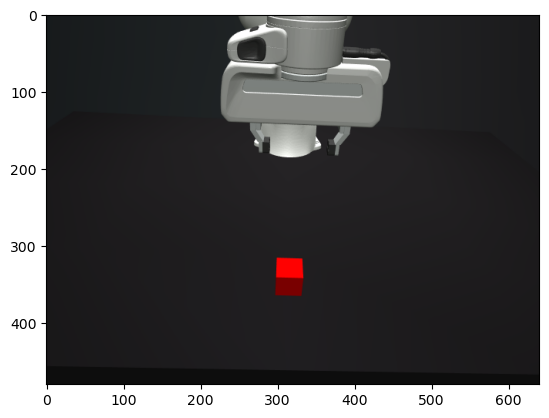

In [3]:
import matplotlib.pyplot as plt
env.reset()
plt.imshow(env.render())

In [4]:
# # what's happening under the hood:

# # initialize randomization -> stores original setting
# env.unwrapped._robot.init_randomize()

# # randomize and apply
# env.unwrapped._robot.randomize()
# env.reset()

# plt.imshow(env.render())

Object pose: [0.526988847748008, 0.02664058168263006, 0.02, 0.9829670068398505, 0.0, 0.0, -0.18378210866214742] - seed 0
Object pose: [0.43994700616357685, -0.011947124297693928, 0.02, 0.9859498523263472, 0.0, -0.0, 0.16704157775133135] - seed 0
Object pose: [0.45841464248165176, -0.17826480466429856, 0.02, 0.9722803763183907, 0.0, 0.0, -0.23381802716251074] - seed 0
Object pose: [0.6125672348240685, -0.14511183196112218, 0.02, 0.9773724017829234, 0.0, 0.0, -0.21152585712645114] - seed 0
Object pose: [0.6261727781011253, 0.10613010152278612, 0.02, 0.9813700293361263, 0.0, -0.0, 0.19212721181761516] - seed 0
Object pose: [0.5655491110877857, -0.03545103438482483, 0.02, 0.9938047560446803, 0.0, 0.0, -0.11114003267487971] - seed 0


Object pose: [0.48503985407855565, -0.0908712390302132, 0.02, 0.994771132042619, 0.0, 0.0, -0.10212930458319103] - seed 0
Object pose: [0.4986713963024353, 0.14520904666413997, 0.02, 0.9639965401682582, 0.0, 0.0, -0.26591478060391416] - seed 0
Object pose: [0.31518177041864215, 0.055504702946611695, 0.02, 0.9999609622199387, 0.0, 0.0, -0.00883595134517605] - seed 0
Object pose: [0.5453561350774451, 0.022144505210469928, 0.02, 0.9725580080469993, 0.0, 0.0, -0.2326605273432793] - seed 0
Object pose: [0.3319694747838807, -0.06332075405410717, 0.02, 0.9906765812238896, 0.0, -0.0, 0.1362347658072127] - seed 0
Object pose: [0.40174243128999465, 0.016851781431975354, 0.02, 0.9559606685931883, 0.0, 0.0, -0.2934948042178336] - seed 0
Object pose: [0.39717103221481653, -0.017392043494937864, 0.02, 0.9917649721915772, 0.0, 0.0, -0.12807122992241476] - seed 0
Object pose: [0.6369037223568748, -0.16001659376285998, 0.02, 0.9353767253407609, 0.0, 0.0, -0.35365291132803484] - seed 0
Object pose: [0.2

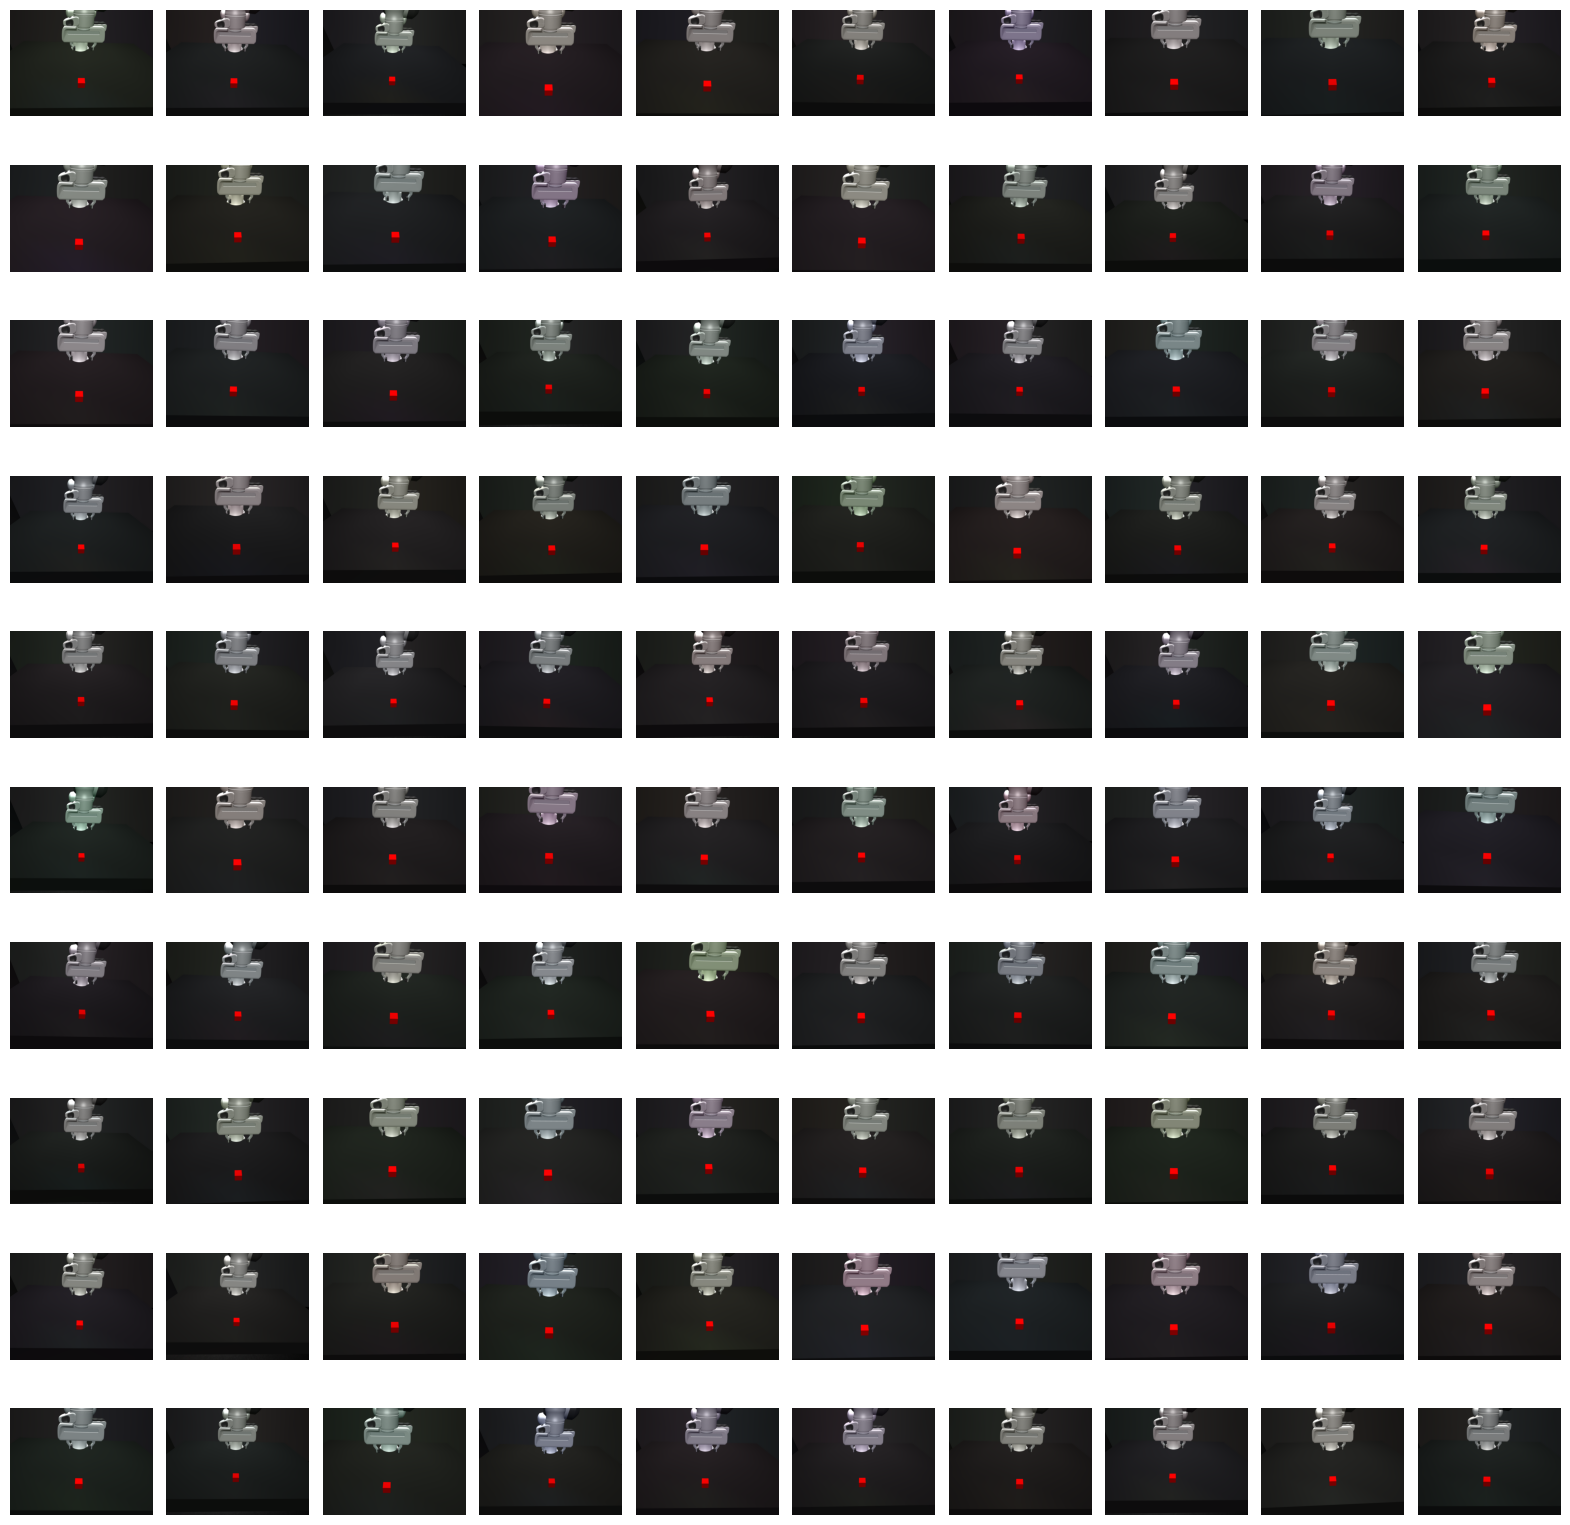

In [5]:
import matplotlib.pyplot as plt

# Apply the randomization 100 times
def get_randomized_img(env):
    env.reset()
    return env.render()

transformed_images = [get_randomized_img(env) for _ in range(100)]

# Create a grid of images
fig, axes = plt.subplots(10, 10, figsize=(20, 20))

for ax, img in zip(axes.flatten(), transformed_images):
    ax.imshow(img)
    ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()